In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn import metrics
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering
import scipy.cluster.hierarchy  as sch
#from keras.layers import Dense

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv("E:\\Churn prediction\\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# EDA

In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
# validation the datatypes

In [8]:
# Check for null values

In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# There are no null values in given dataset

# Check for duplicate values

In [11]:
df[df.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [12]:
# There is no duplicate records in gvn dataset

In [13]:
# Distribution of datset

In [14]:
# An

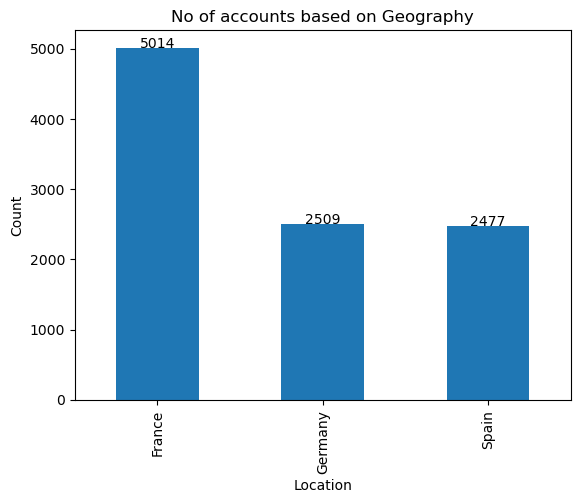

In [15]:
df['Geography'].value_counts().plot(kind='bar')
plt.title('No of accounts based on Geography')
plt.xlabel('Location')
plt.ylabel('Count')

for i,j in enumerate(df['Geography'].value_counts()):
    plt.text(i,j,str(j),ha='center')

In [16]:
# Most of the account holders are from the Country-France
# Account holders from location Germany and Spain are 1:1

In [17]:
# Distribution of plot

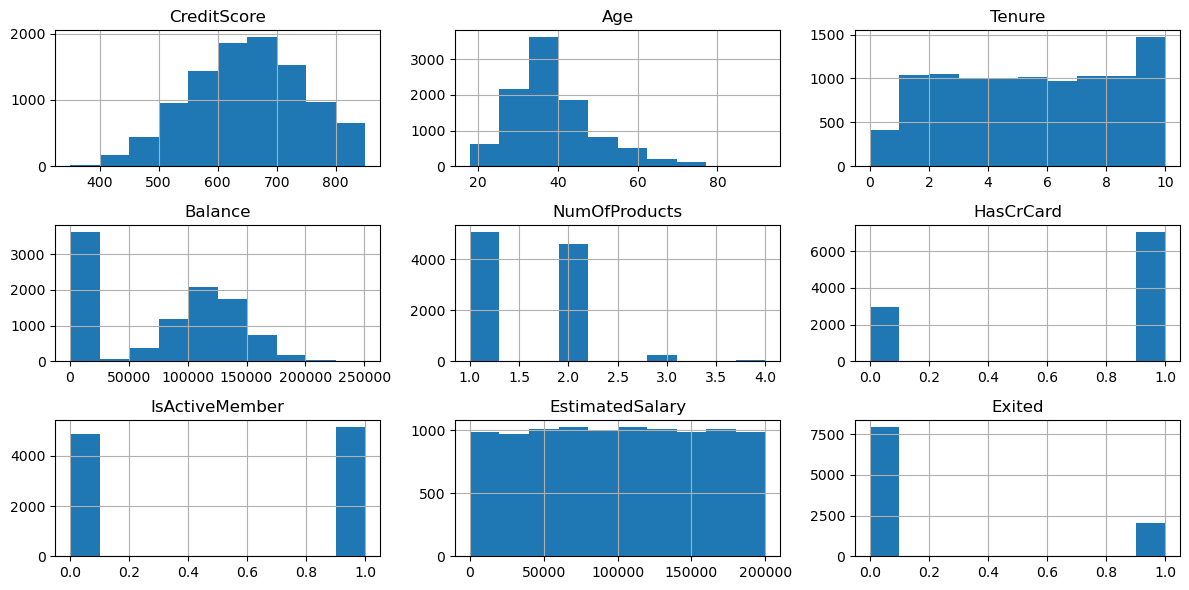

In [18]:
df.hist(figsize=(12,6));
plt.tight_layout()

In [19]:
cont_features=df.select_dtypes(exclude=['object']).columns
cont_features

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [20]:
import warnings
warnings.filterwarnings('ignore')

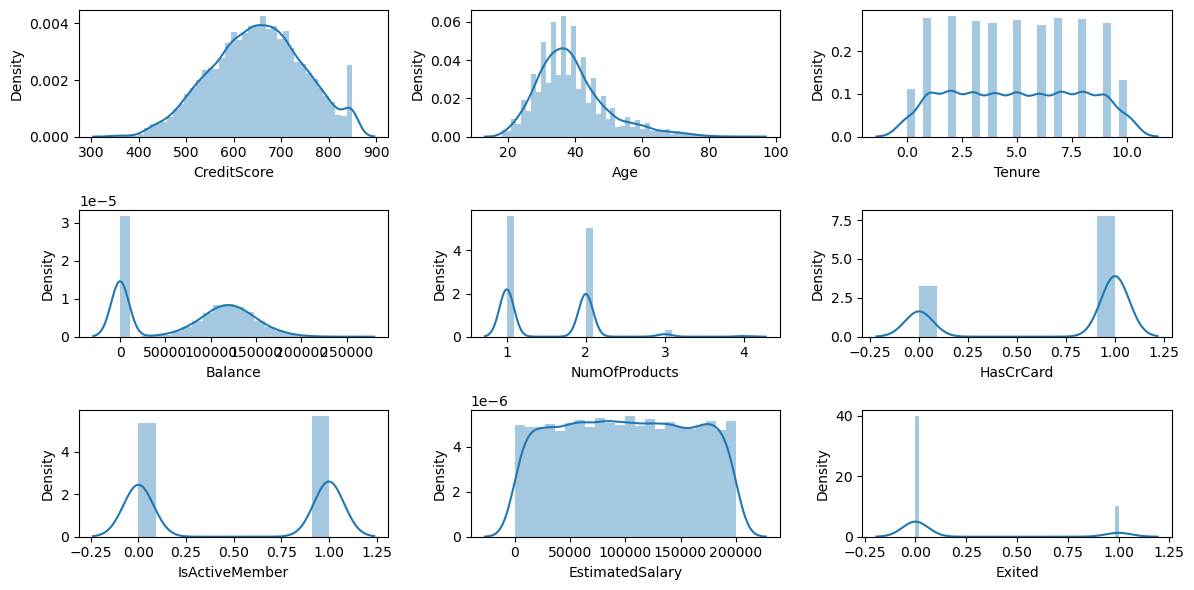

In [21]:
fig=plt.figure(figsize=(12,6))
count=1
for i,j in enumerate(cont_features):
    plt.subplots_adjust(left=0.75,bottom=0.75,right=2,top=2, wspace=0.1,hspace=0.1)
    fig,plt.subplot(3,3,count)
    sns.distplot(df[j])
    count+=1
plt.tight_layout()
plt.show()

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


- These statistics can provide some insights into the distribution of credit scores in the dataset.we can see that the majority of credit scores fall between 584 and 718, with a median credit score of 652. However, there are some credit scores that are much lower or higher than this range, with the minimum score of 350 and maximum score of 850. These outliers may be worth further investigation to understand if they are legitimate data points or if they are errors or anomalies that need to be addressed

- For Age column we can see that average age of customers are around 39,however the majority of customers age fall between the 18 and 44 with median of 37 and also maximum can be seen is 92 and min age is 18


- average salary of customers is 100090 approx,however the majority of salary lies between 51002 and 149388 with median of 97198.540 

- custumers are maintaining average balance of 76485,as we can see that 36% of customers are maintaining the balamce 0 and the remaining customers are maintaing the  average balance of 125449.045

In [23]:
(np.percentile(df['Balance'],100)-np.percentile(df['Balance'],36))/2

125449.045

# Outliers detection

In [24]:
# Finding the outliers using z-score
# Calculate the Z-score for each data point
z_scores = np.abs((df - df.mean()) / df.std())

# Identify outliers with Z-scores greater than 3 or less than -3
outliers = z_scores > 3

# Print the number of outliers found for each column
print(outliers.sum())

Age                133
Balance              0
CreditScore          8
EstimatedSalary      0
Exited               0
Gender               0
Geography            0
HasCrCard            0
IsActiveMember       0
NumOfProducts       60
Tenure               0
dtype: int64


In [25]:
outlier_indices = np.where(outliers)
outlier_df = df.iloc[outlier_indices[0]]
outlier_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
70,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
158,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
230,673,France,Male,72,1,0.00,2,0,1,111981.19,0
...,...,...,...,...,...,...,...,...,...,...,...
9646,850,Spain,Male,71,10,69608.14,1,1,0,97893.40,1
9671,649,Germany,Male,78,4,68345.86,2,1,1,142566.75,0
9736,659,Spain,Male,78,2,151675.65,1,0,1,49978.67,0
9894,521,France,Female,77,6,0.00,2,1,1,49054.10,0


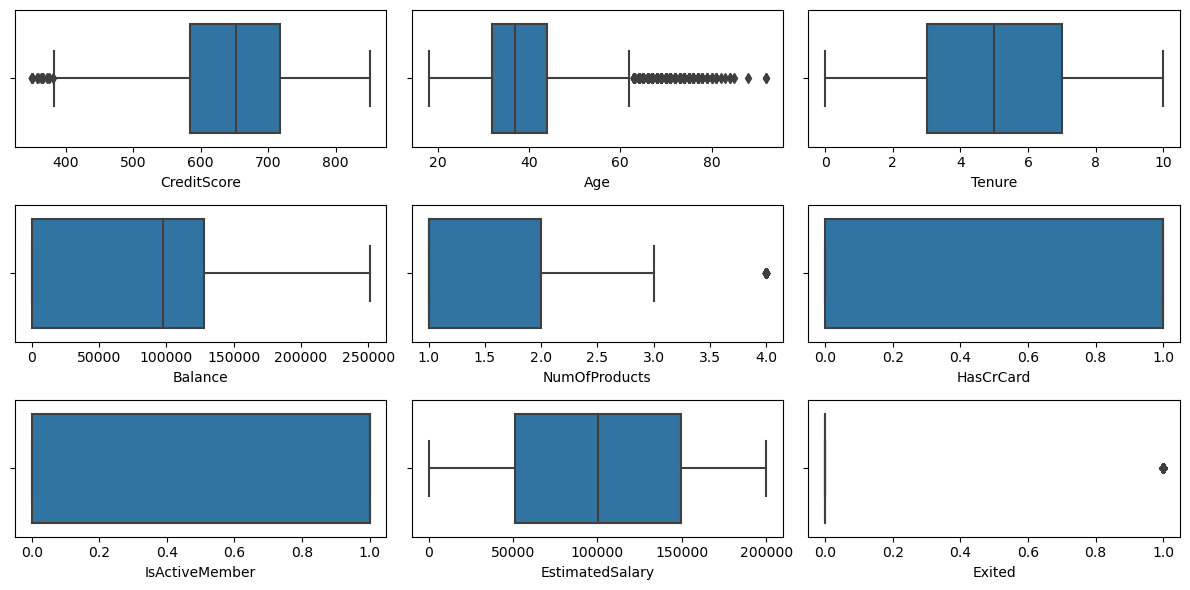

In [26]:
fig = plt.figure(figsize=(12, 6))
count = 1
for i, j in enumerate(cont_features):
    plt.subplots_adjust(left=0.75, bottom=0.75, right=2, top=2, wspace=0.1, hspace=0.1)
    ax = fig.add_subplot(3, 3, count)
    sns.boxplot(df[j], ax=ax)
    ax.set_xlabel(j)  # set the x-axis label to the column name
    count += 1
plt.tight_layout()
plt.show()

In [27]:
# There are outliers in Creditscore,Age,Exited
# Will store the outliers in variable,in order to remove the outliers we need a domain knowlegde

In [28]:
# Check for imbalance data

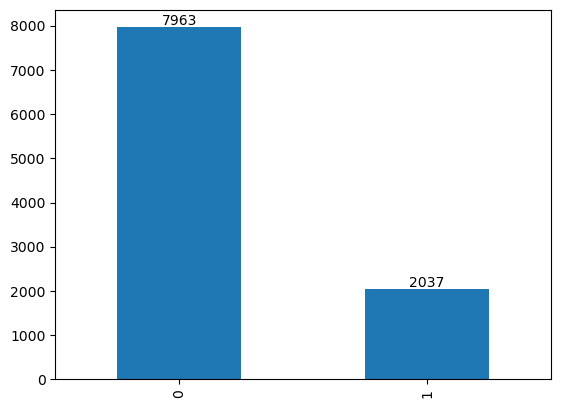

In [29]:
df['Exited'].value_counts().plot(kind='bar')
for i,j in enumerate(df['Exited'].value_counts()):
    plt.text(i,j,str(j),ha='center',va='bottom')

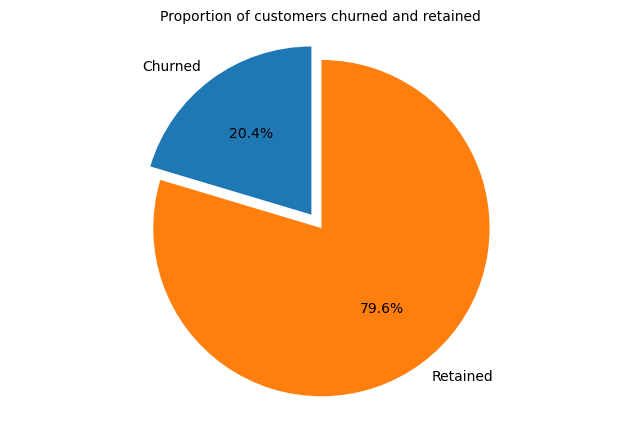

In [30]:
churn_count=df[df['Exited']==1]['Exited'].count()
retain_count=df[df['Exited']==0]['Exited'].count()

labels=['Churned','Retained']
sizes=[churn_count,retain_count]

fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(sizes,labels=labels,autopct='%1.1f%%',explode=[0.1,0],startangle=90)
plt.title('Proportion of customers churned and retained', size=10)
ax.axis('equal');

In [31]:
# most of customers from class 0 are still maintaining the bank account
# but class 1 2037 has closed the bank account

Text(1066.1767676767674, 0.5, 'Has Credit Card')

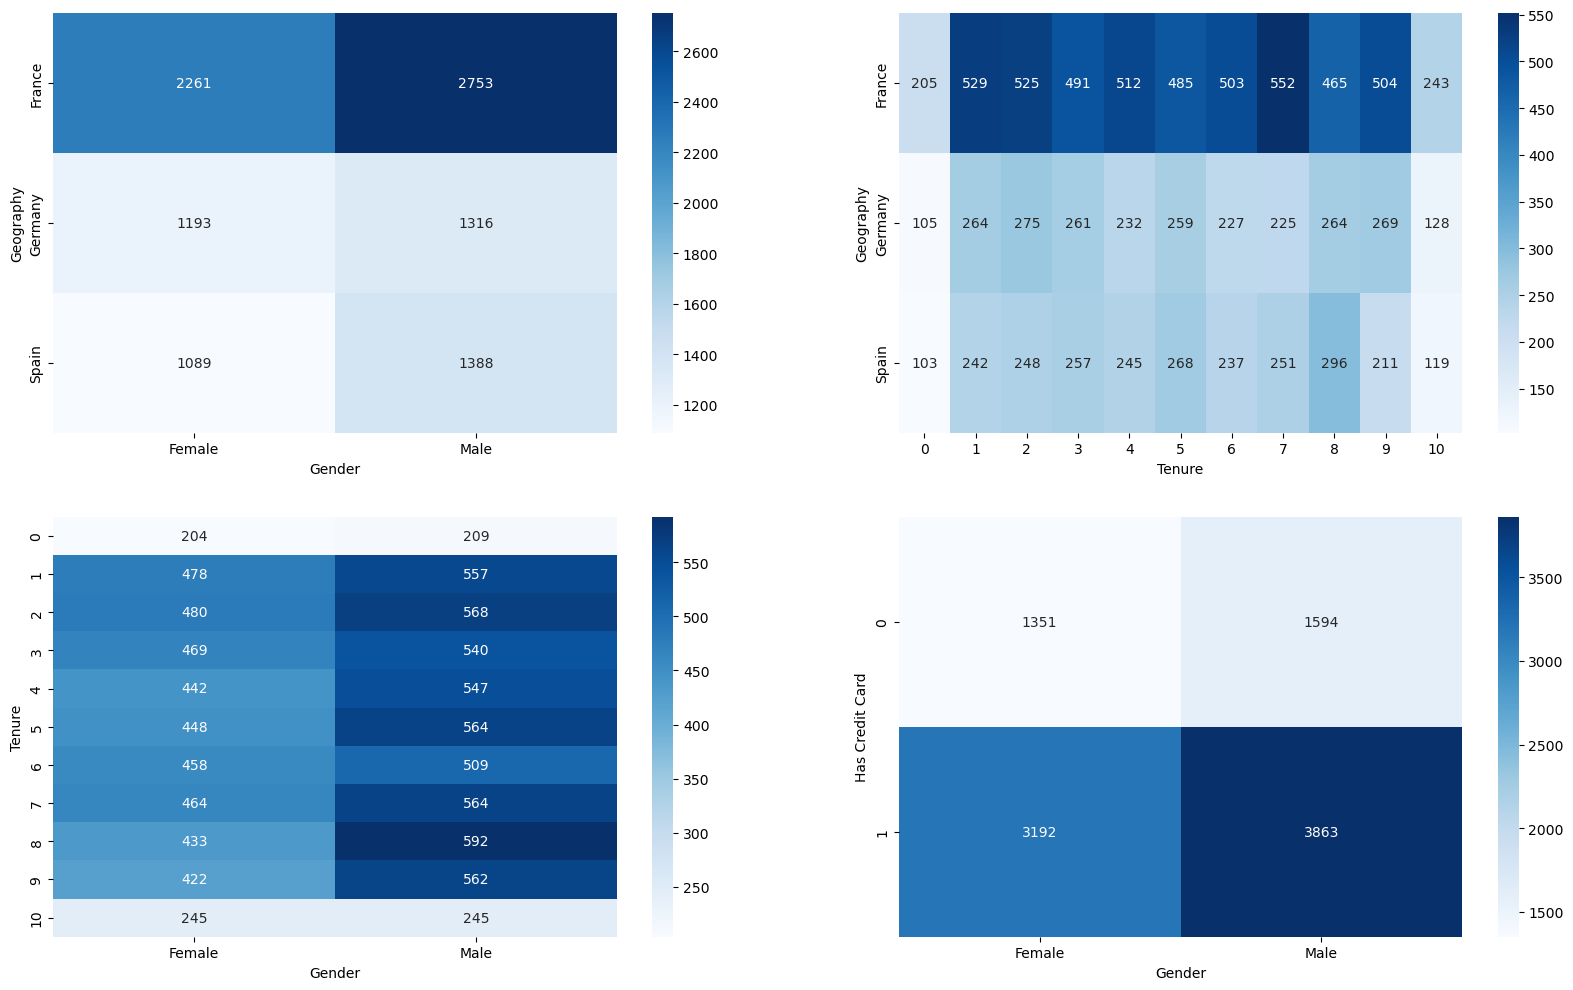

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(20,12))
palette = 'Set1'
ct = pd.crosstab(df['Geography'], df['Gender'])
sns.heatmap(ct, cmap='Blues', annot=True, fmt='d', ax=ax[0][0])
ax[0][0].set_xlabel('Gender')
ax[0][0].set_ylabel('Geography')

ct1 = pd.crosstab(df['Geography'], df['Tenure'])
sns.heatmap(ct1, cmap='Blues', annot=True, fmt='d', ax=ax[0][1])
ax[0][1].set_xlabel('Tenure')
ax[0][1].set_ylabel('Geography')

ct2 = pd.crosstab(df['Tenure'], df['Gender'])
sns.heatmap(ct2, cmap='Blues', annot=True, fmt='d', ax=ax[1][0])
ax[1][0].set_xlabel('Gender')
ax[1][0].set_ylabel('Tenure')

ct3 = pd.crosstab(df['HasCrCard'], df['Gender'])
sns.heatmap(ct3, cmap='Blues', annot=True, fmt='d', ax=ax[1][1])
ax[1][1].set_xlabel('Gender')
ax[1][1].set_ylabel('Has Credit Card')


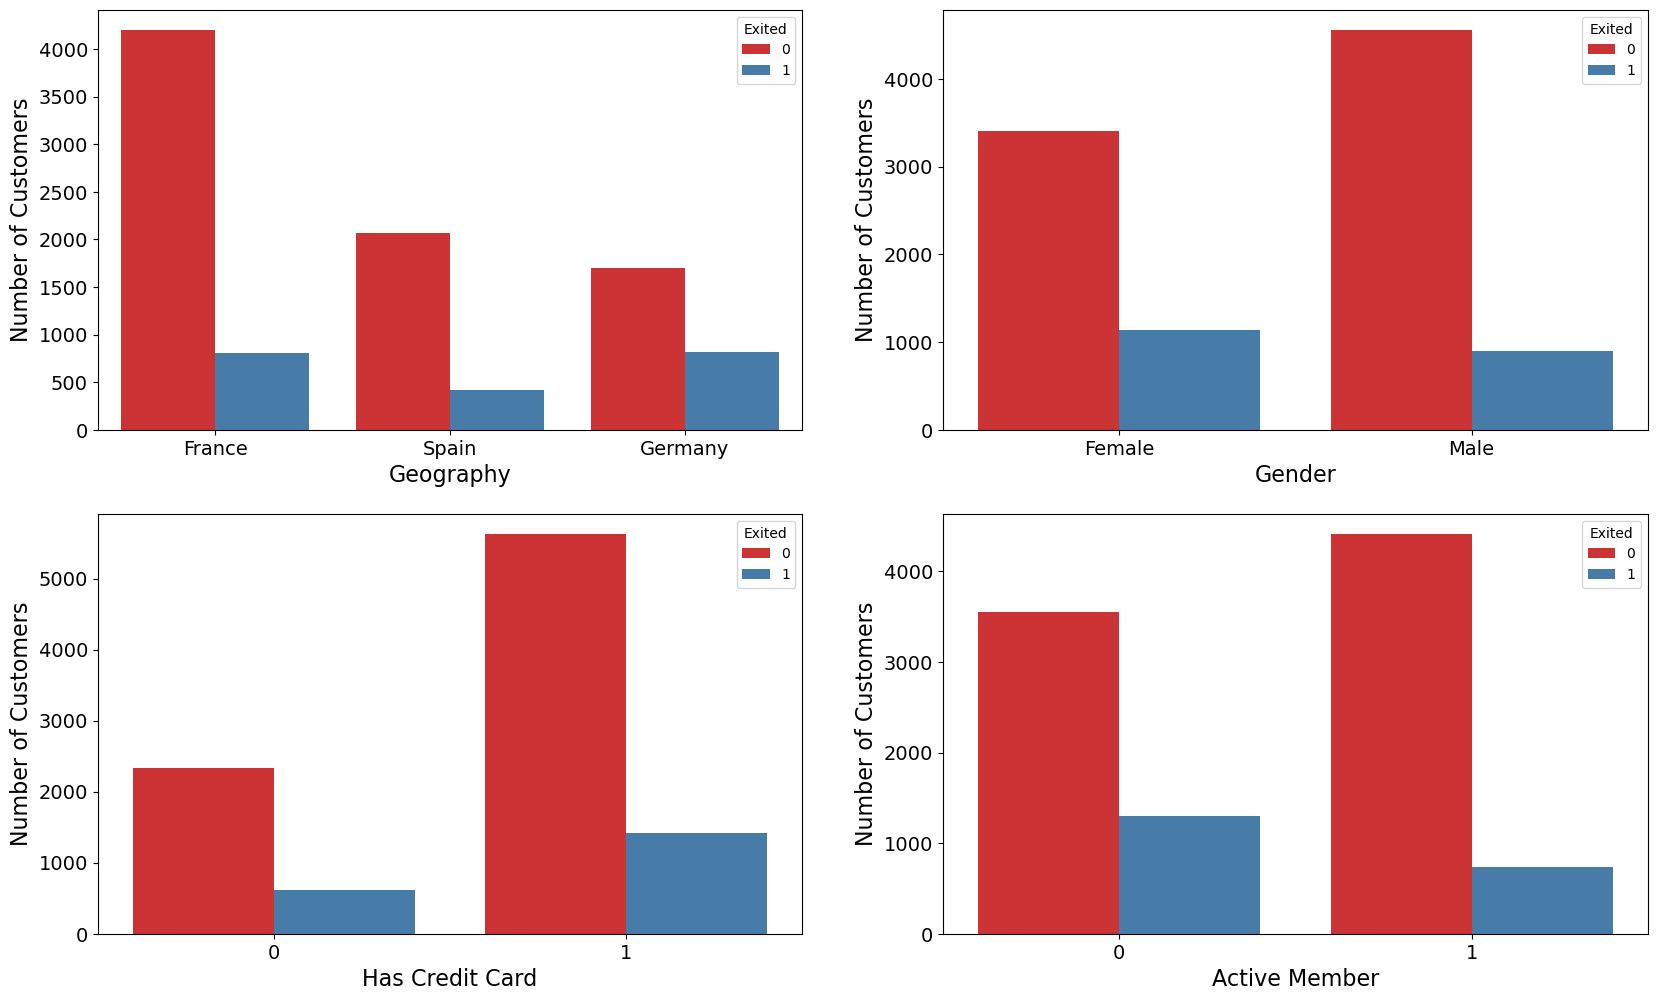

In [33]:
fig,axarr= plt.subplots(2,2, figsize=(20,12))
palette = 'Set1'

sns.countplot(x='Geography', hue='Exited', data=df, palette=palette, ax=axarr[0][0])
axarr[0][0].set_xlabel('Geography', fontsize=16)
axarr[0][0].set_ylabel('Number of Customers', fontsize=16)
axarr[0][0].tick_params(labelsize=14)

sns.countplot(x='Gender', hue='Exited', data=df, palette=palette, ax=axarr[0][1])
axarr[0][1].set_xlabel('Gender', fontsize=16)
axarr[0][1].set_ylabel('Number of Customers', fontsize=16)
axarr[0][1].tick_params(labelsize=14)

sns.countplot(x='HasCrCard', hue='Exited', data=df, palette=palette, ax=axarr[1][0])
axarr[1][0].set_xlabel('Has Credit Card', fontsize=16)
axarr[1][0].set_ylabel('Number of Customers', fontsize=16)
axarr[1][0].tick_params(labelsize=14)

sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette=palette, ax=axarr[1][1])
axarr[1][1].set_xlabel('Active Member', fontsize=16)
axarr[1][1].set_ylabel('Number of Customers', fontsize=16)
axarr[1][1].tick_params(labelsize=14)


# Correlation 

In [34]:
corr=df.corrwith(df['Exited'])
corr

CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
dtype: float64

(<Figure size 1200x600 with 2 Axes>, <AxesSubplot:>)

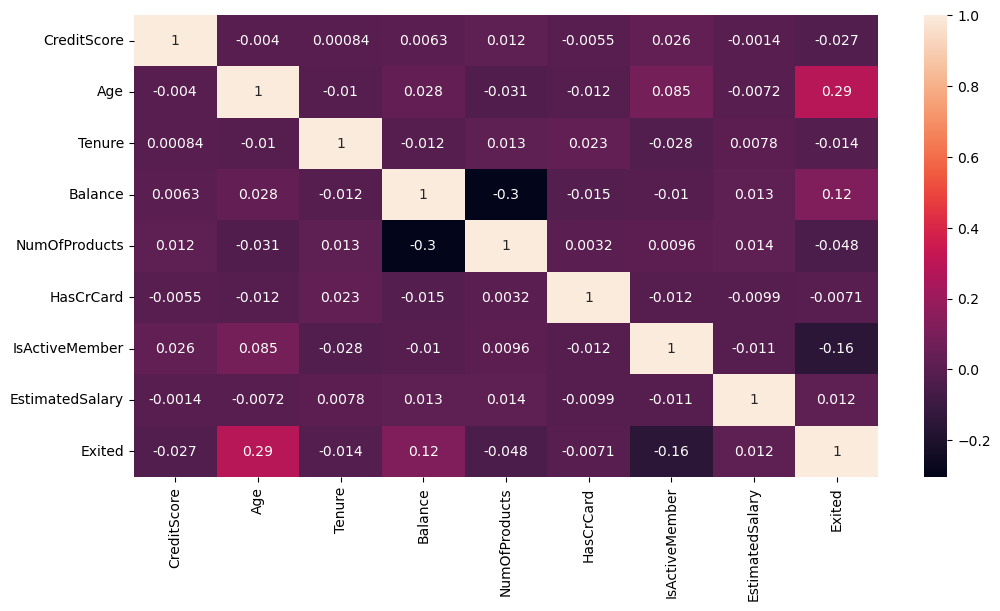

In [35]:
fig=plt.figure(figsize=(12,6))
fig,sns.heatmap(df.corr(),annot=True)

# Most of the feature are not significant to target variable

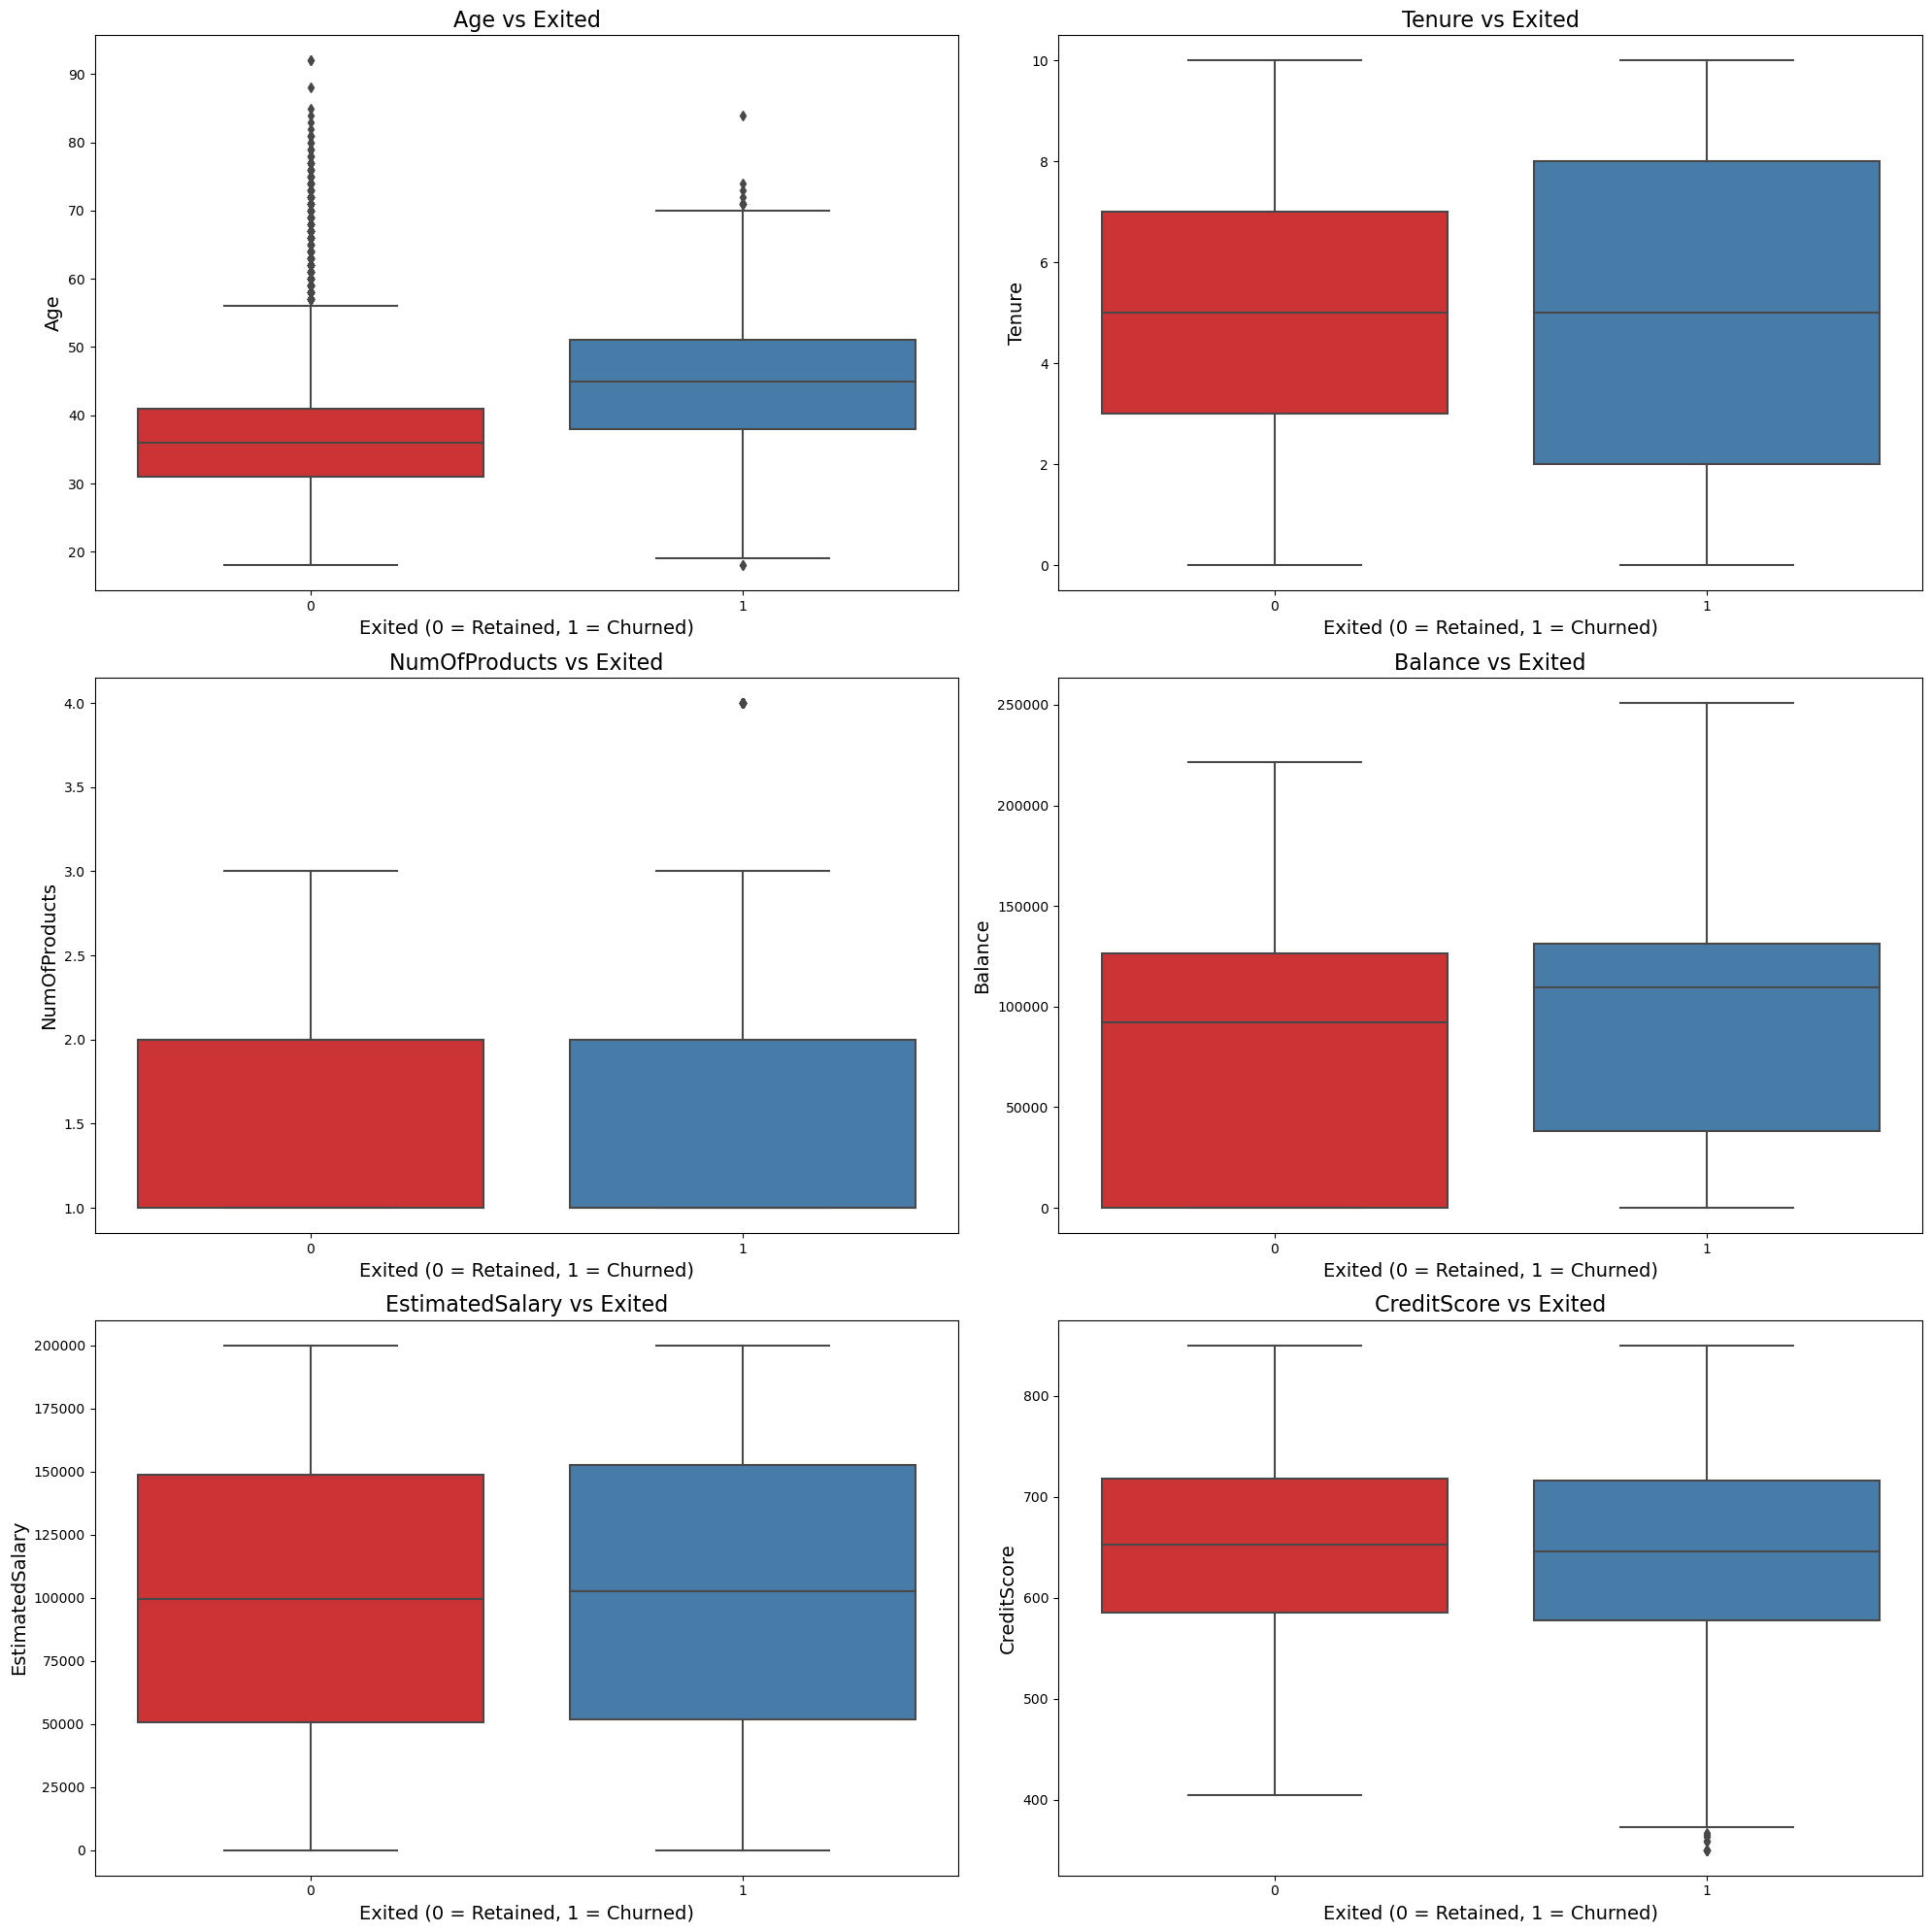

In [36]:
fig, axarr = plt.subplots(3,2, figsize=(20,20))

sns.boxplot(y=df['Age'], x=df['Exited'], ax=axarr[0][0], palette='Set1')
axarr[0][0].set_title('Age vs Exited', size=16)
axarr[0][0].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[0][0].set_ylabel('Age', size=14)

sns.boxplot(y=df['Tenure'], x=df['Exited'], ax=axarr[0][1], palette='Set1')
axarr[0][1].set_title('Tenure vs Exited', size=16)
axarr[0][1].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[0][1].set_ylabel('Tenure', size=14)

sns.boxplot(y=df['NumOfProducts'], x=df['Exited'], ax=axarr[1][0], palette='Set1')
axarr[1][0].set_title('NumOfProducts vs Exited', size=16)
axarr[1][0].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[1][0].set_ylabel('NumOfProducts', size=14)

sns.boxplot(y=df['Balance'], x=df['Exited'], ax=axarr[1][1], palette='Set1')
axarr[1][1].set_title('Balance vs Exited', size=16)
axarr[1][1].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[1][1].set_ylabel('Balance', size=14)

sns.boxplot(y=df['EstimatedSalary'], x=df['Exited'], ax=axarr[2][0], palette='Set1')
axarr[2][0].set_title('EstimatedSalary vs Exited', size=16)
axarr[2][0].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[2][0].set_ylabel('EstimatedSalary', size=14)

sns.boxplot(y=df['CreditScore'], x=df['Exited'], ax=axarr[2][1], palette='Set1')
axarr[2][1].set_title('CreditScore vs Exited', size=16)
axarr[2][1].set_xlabel('Exited (0 = Retained, 1 = Churned)', size=14)
axarr[2][1].set_ylabel('CreditScore', size=14)

plt.tight_layout()
plt.show()

In [37]:
cont_features=df.select_dtypes('float64').columns
cont_features

Index(['Balance', 'EstimatedSalary'], dtype='object')

In [38]:
disc_features=df.select_dtypes('int64').columns
disc_features

Index(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [39]:
cat_columns=df.select_dtypes('object').columns
cat_columns

Index(['Geography', 'Gender'], dtype='object')

Text(1021.4999999999999, 0.5, 'Age')

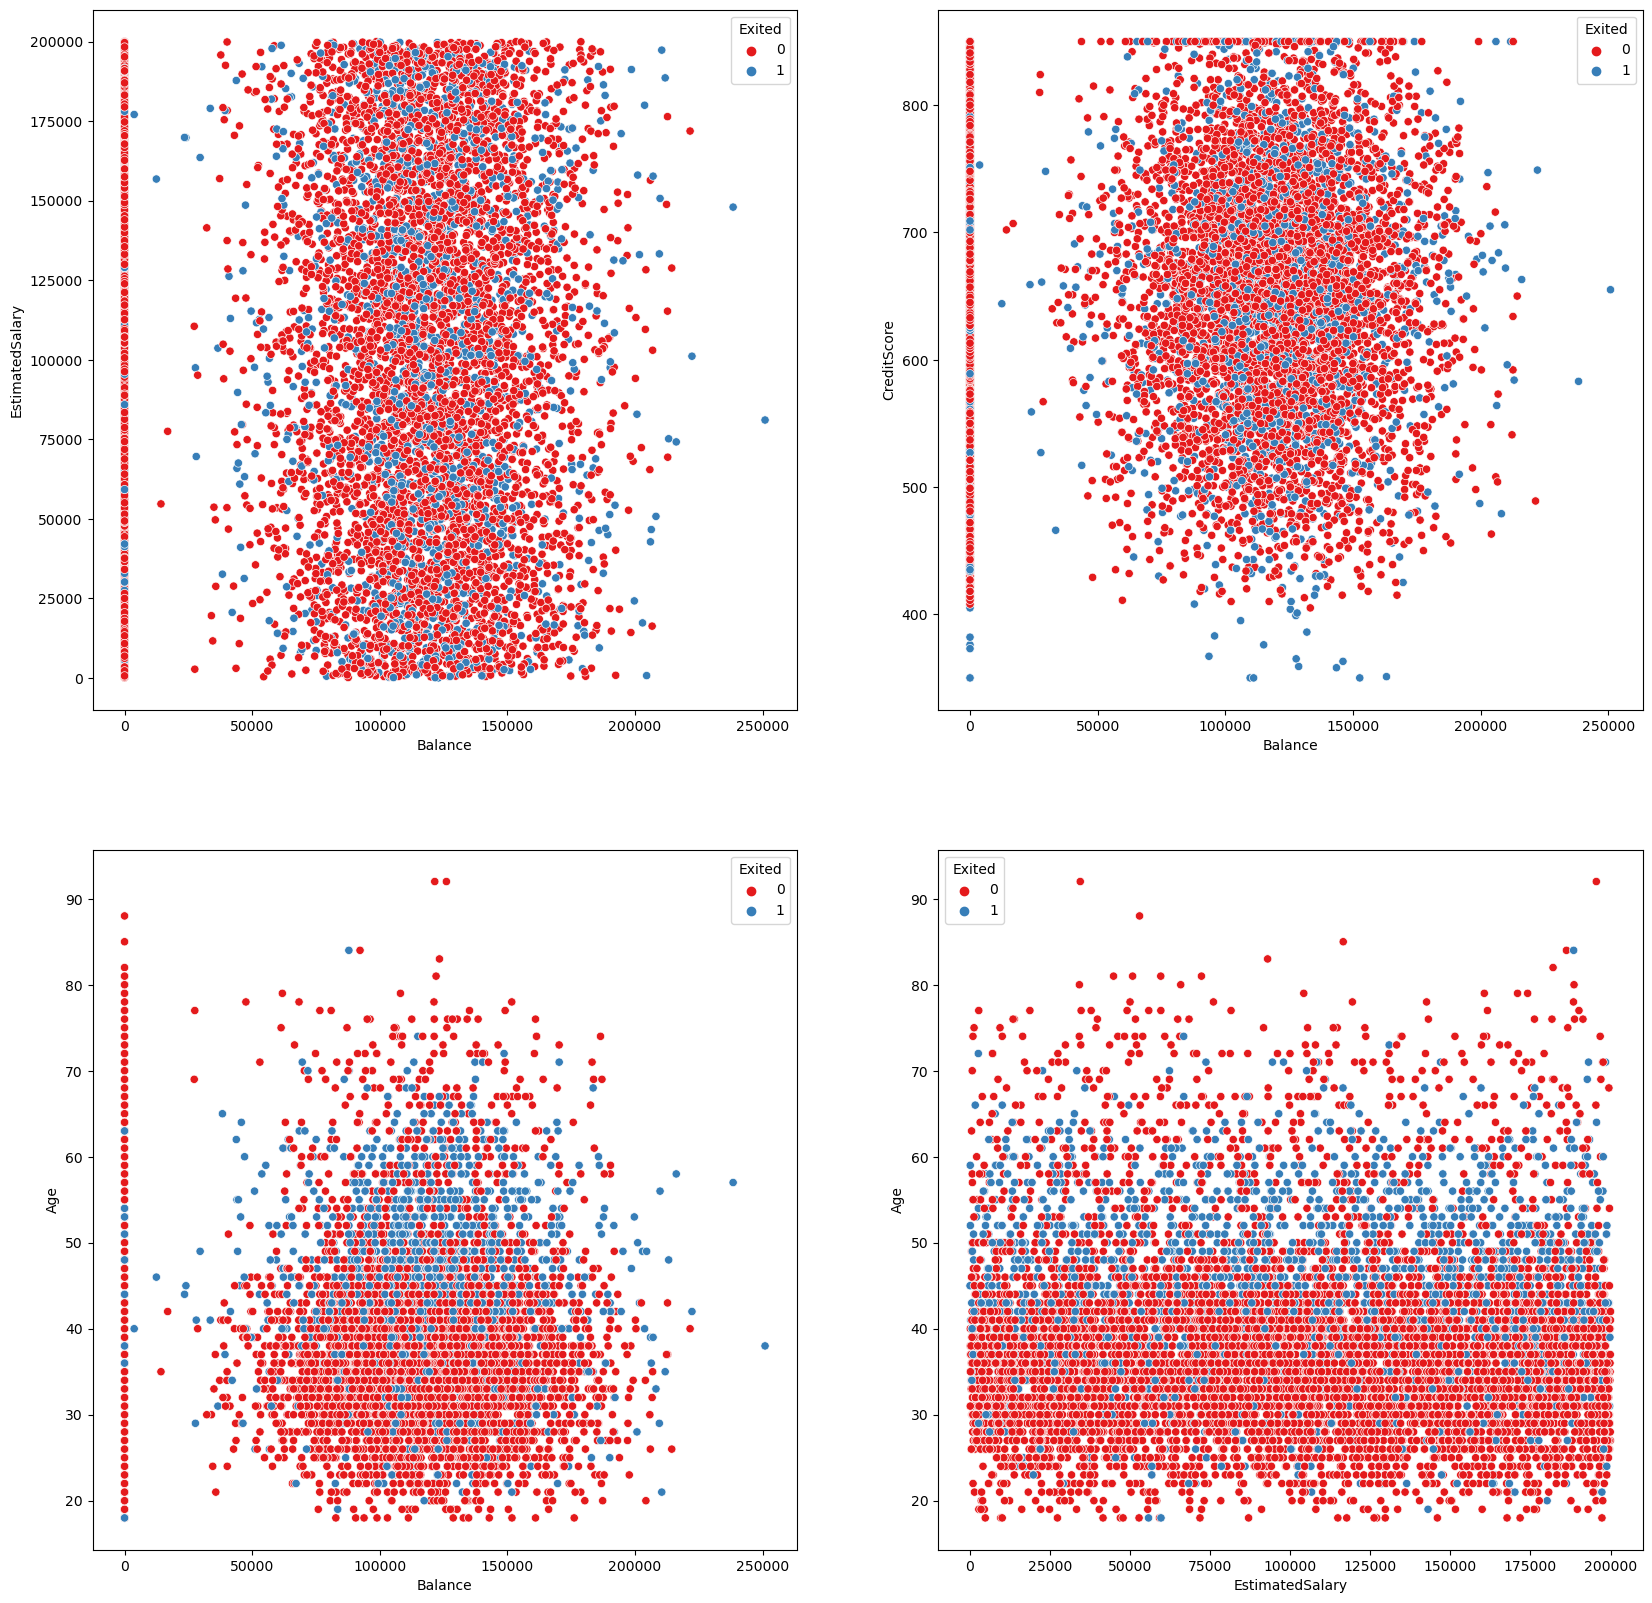

In [40]:
fig,ax=plt.subplots(2,2,figsize=(20,20))

ax[0][0]=sns.scatterplot(x=df['Balance'],y=df['EstimatedSalary'],ax=ax[0][0],hue=df['Exited'],palette='Set1')
axarr[0][0].set_title('Balance vs EstimatedSalary', size=16)
axarr[0][0].set_xlabel('Balance size',size=14)
axarr[0][0].set_ylabel('EstimatedSalary', size=14)

ax[0][1]=sns.scatterplot(x=df['Balance'],y=df['CreditScore'],ax=ax[0][1],hue=df['Exited'],palette='Set1')
axarr[0][1].set_title('Balance vs CreditScore', size=16)
axarr[0][1].set_xlabel('Balance size',size=14)
axarr[0][1].set_ylabel('CreditScore', size=14)

ax[1][0]=sns.scatterplot(x=df['Balance'],y=df['Age'],ax=ax[1][0],hue=df['Exited'],palette='Set1')
axarr[1][0].set_title('Balance vs Age', size=16)
axarr[1][0].set_xlabel('Balance size',size=14)
axarr[1][0].set_ylabel('Age', size=14)

ax[1][1]=sns.scatterplot(x=df['EstimatedSalary'],y=df['Age'],ax=ax[1][1],hue=df['Exited'],palette='Set1')
axarr[1][1].set_title('Balance vs EstimatedSalary', size=16)
axarr[1][1].set_xlabel('Balance',size=14)
axarr[1][1].set_ylabel('Age', size=14)

In [41]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Converting the categorical column to numerical

In [42]:
lb=LabelEncoder()
for i in cat_columns:
    df[i]=lb.fit_transform(df[i])

# test train split

In [43]:
x=df.drop(columns=['Exited'])
y=df.Exited

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# feature scaling

In [45]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

# Model building

- since given dataset is imbalanced First we need to create a base model 

In [46]:
from sklearn.metrics import accuracy_score

# Logistic regression

In [47]:
logit=LogisticRegression().fit(X_train,y_train)
y_pred=logit.predict(X_test)
print("training accuracy:{}".format(logit.score(X_train,y_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,y_test)))
print(metrics.classification_report(y_pred,y_test))

training accuracy:0.8045714285714286
test accuracy:0.8166666666666667
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      2832
           1       0.17      0.60      0.27       168

    accuracy                           0.82      3000
   macro avg       0.57      0.72      0.58      3000
weighted avg       0.93      0.82      0.86      3000



<AxesSubplot:>

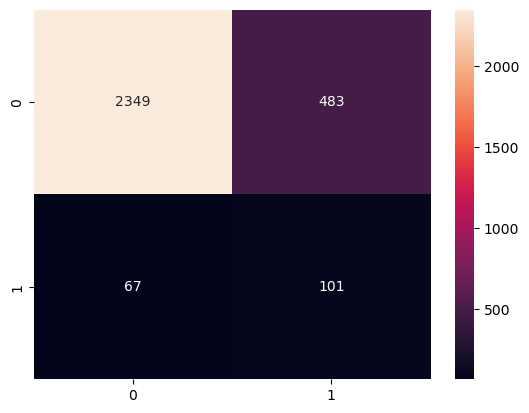

In [48]:
con_mtx=metrics.confusion_matrix(y_pred,y_test)
sns.heatmap(con_mtx,annot=True,fmt='d')

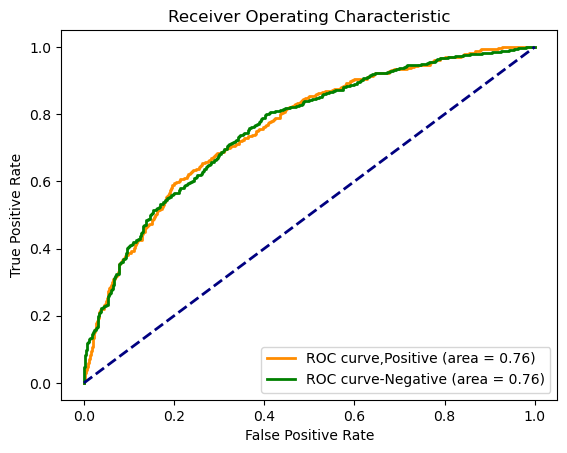

In [155]:
y_prob=logit.predict_proba(X_test)

fpr_pos,tpr_pos,threshold_pos=metrics.roc_curve(y_test,y_prob[:,1],pos_label=1)
fpr_neg,tpr_neg,threshold_neg=metrics.roc_curve(y_test,y_prob[:,0],pos_label=0)

auc_pos=metrics.auc(fpr_pos,tpr_pos)
auc_neg=metrics.auc(fpr_neg,tpr_neg)

plt.plot(fpr_pos, tpr_pos, color='darkorange', lw=2, label='ROC curve,Positive (area = %0.2f)' % auc_pos)
plt.plot(fpr_neg, tpr_neg, color='green', lw=2, label='ROC curve-Negative (area = %0.2f)' % auc_neg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Svm model

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [51]:
# svm_model=SVC()

# param_grid = {'C': [0.1, 1, 10, 100],
#               'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#               'gamma': ['scale', 'auto', 0.1, 1, 10]}
# grid_svm=GridSearchCV(svm_model,param_grid=param_grid,cv=5,verbose=10)
# grid_svm.fit(X_train,y_train)

In [53]:
# C=0.1, gamma=1, kernel=poly;
svm_model=SVC(C=0.1,gamma=1,kernel='poly').fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
print("training accuracy:{}".format(svm_model.score(X_train,y_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,y_test)))
print(metrics.classification_report(y_pred,y_test))

training accuracy:0.8581428571428571
test accuracy:0.8693333333333333
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      2746
           1       0.38      0.88      0.53       254

    accuracy                           0.87      3000
   macro avg       0.68      0.87      0.73      3000
weighted avg       0.94      0.87      0.89      3000



<AxesSubplot:>

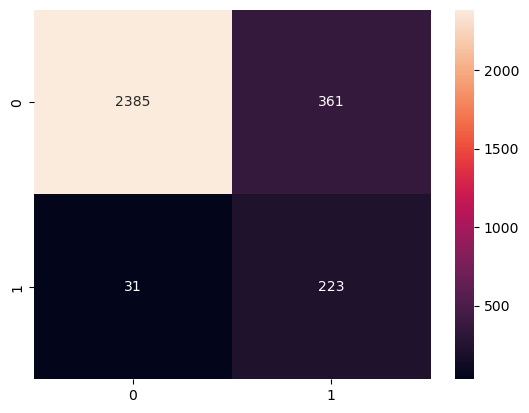

In [54]:
con_mtx=metrics.confusion_matrix(y_pred,y_test)
sns.heatmap(con_mtx,annot=True,fmt='d')

# Recall is well improved from 0.6 to 0.88 whereas the precision is improved to 0.20 to 0.38

# Upsampling the given dataset using smote method

In [56]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)

X_resampled,y_resampled=smote.fit_resample(x,y)

In [59]:
y_resampled.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [61]:
Xs_train,Xs_test,Ys_train,Ys_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

In [62]:
Xs1_train=scaler.fit_transform(Xs_train)
Xs1_test=scaler.fit_transform(Xs_test)

# Model building after upsampling

In [ ]:
# Logit regression

In [63]:
logit=LogisticRegression().fit(Xs1_train,Ys_train)
y_pred=logit.predict(Xs1_test)
print("training accuracy:{}".format(logit.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:0.774578399712953
test accuracy:0.7653830054416074
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2359
           1       0.78      0.75      0.77      2419

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778



# Now Recall and Precision  is well improved.

In [ ]:
# Svm model

In [74]:
svm_model=SVC(C=0.1,gamma=1,kernel='poly').fit(Xs1_train,Ys_train)
y_pred=svm_model.predict(Xs1_test)
print("training accuracy:{}".format(svm_model.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:0.837908144958737
test accuracy:0.8281707827542905
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      2341
           1       0.84      0.81      0.83      2437

    accuracy                           0.83      4778
   macro avg       0.83      0.83      0.83      4778
weighted avg       0.83      0.83      0.83      4778



# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn_model=KNeighborsClassifier(n_neighbors=10).fit(Xs1_train,Ys_train)
y_pred=knn_model.predict(Xs1_test)
print("training accuracy:{}".format(knn_model.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:0.8461607463222103
test accuracy:0.817915445793219
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2490
           1       0.80      0.82      0.81      2288

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778



# Decision Tree

In [85]:
dt_model=DecisionTreeClassifier()
param_grid={'max_depth':range(1,20),'criterion':['gini','entropy']}
dt_grid=GridSearchCV(dt_model,param_grid=param_grid,cv=5,verbose=10).fit(Xs1_train,Ys_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits
[CV 1/5; 1/38] START criterion=gini, max_depth=1................................
[CV 1/5; 1/38] END .criterion=gini, max_depth=1;, score=0.693 total time=   0.0s
[CV 2/5; 1/38] START criterion=gini, max_depth=1................................
[CV 2/5; 1/38] END .criterion=gini, max_depth=1;, score=0.663 total time=   0.0s
[CV 3/5; 1/38] START criterion=gini, max_depth=1................................
[CV 3/5; 1/38] END .criterion=gini, max_depth=1;, score=0.692 total time=   0.0s
[CV 4/5; 1/38] START criterion=gini, max_depth=1................................
[CV 4/5; 1/38] END .criterion=gini, max_depth=1;, score=0.693 total time=   0.0s
[CV 5/5; 1/38] START criterion=gini, max_depth=1................................
[CV 5/5; 1/38] END .criterion=gini, max_depth=1;, score=0.700 total time=   0.0s
[CV 1/5; 2/38] START criterion=gini, max_depth=2................................
[CV 1/5; 2/38] END .criterion=gini, max_depth=2

[CV 2/5; 11/38] END criterion=gini, max_depth=11;, score=0.794 total time=   0.0s
[CV 3/5; 11/38] START criterion=gini, max_depth=11..............................
[CV 3/5; 11/38] END criterion=gini, max_depth=11;, score=0.817 total time=   0.0s
[CV 4/5; 11/38] START criterion=gini, max_depth=11..............................
[CV 4/5; 11/38] END criterion=gini, max_depth=11;, score=0.793 total time=   0.0s
[CV 5/5; 11/38] START criterion=gini, max_depth=11..............................
[CV 5/5; 11/38] END criterion=gini, max_depth=11;, score=0.797 total time=   0.0s
[CV 1/5; 12/38] START criterion=gini, max_depth=12..............................
[CV 1/5; 12/38] END criterion=gini, max_depth=12;, score=0.789 total time=   0.0s
[CV 2/5; 12/38] START criterion=gini, max_depth=12..............................
[CV 2/5; 12/38] END criterion=gini, max_depth=12;, score=0.790 total time=   0.0s
[CV 3/5; 12/38] START criterion=gini, max_depth=12..............................
[CV 3/5; 12/38] END cr

[CV 4/5; 22/38] END criterion=entropy, max_depth=3;, score=0.755 total time=   0.0s
[CV 5/5; 22/38] START criterion=entropy, max_depth=3............................
[CV 5/5; 22/38] END criterion=entropy, max_depth=3;, score=0.760 total time=   0.0s
[CV 1/5; 23/38] START criterion=entropy, max_depth=4............................
[CV 1/5; 23/38] END criterion=entropy, max_depth=4;, score=0.787 total time=   0.0s
[CV 2/5; 23/38] START criterion=entropy, max_depth=4............................
[CV 2/5; 23/38] END criterion=entropy, max_depth=4;, score=0.793 total time=   0.0s
[CV 3/5; 23/38] START criterion=entropy, max_depth=4............................
[CV 3/5; 23/38] END criterion=entropy, max_depth=4;, score=0.794 total time=   0.0s
[CV 4/5; 23/38] START criterion=entropy, max_depth=4............................
[CV 4/5; 23/38] END criterion=entropy, max_depth=4;, score=0.769 total time=   0.0s
[CV 5/5; 23/38] START criterion=entropy, max_depth=4............................
[CV 5/5; 2

[CV 1/5; 33/38] END criterion=entropy, max_depth=14;, score=0.787 total time=   0.0s
[CV 2/5; 33/38] START criterion=entropy, max_depth=14...........................
[CV 2/5; 33/38] END criterion=entropy, max_depth=14;, score=0.786 total time=   0.0s
[CV 3/5; 33/38] START criterion=entropy, max_depth=14...........................
[CV 3/5; 33/38] END criterion=entropy, max_depth=14;, score=0.798 total time=   0.0s
[CV 4/5; 33/38] START criterion=entropy, max_depth=14...........................
[CV 4/5; 33/38] END criterion=entropy, max_depth=14;, score=0.795 total time=   0.0s
[CV 5/5; 33/38] START criterion=entropy, max_depth=14...........................
[CV 5/5; 33/38] END criterion=entropy, max_depth=14;, score=0.803 total time=   0.0s
[CV 1/5; 34/38] START criterion=entropy, max_depth=15...........................
[CV 1/5; 34/38] END criterion=entropy, max_depth=15;, score=0.790 total time=   0.0s
[CV 2/5; 34/38] START criterion=entropy, max_depth=15...........................
[CV 

In [86]:
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [87]:
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth= 8).fit(Xs1_train,Ys_train)
y_pred=dt_model.predict(Xs1_test)
print("training accuracy:{}".format(dt_model.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:0.8466092572658773
test accuracy:0.8116366680619506
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2352
           1       0.82      0.80      0.81      2426

    accuracy                           0.81      4778
   macro avg       0.81      0.81      0.81      4778
weighted avg       0.81      0.81      0.81      4778



# Random forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf_model=RandomForestClassifier()
param_grid={'n_estimators':[100,200,500],'max_depth':range(1,20),'criterion':['gini','entropy']}
rf_grid=GridSearchCV(rf_model,param_grid=param_grid,cv=5,verbose=10).fit(Xs1_train,Ys_train)

Fitting 5 folds for each of 114 candidates, totalling 570 fits
[CV 1/5; 1/114] START criterion=gini, max_depth=1, n_estimators=100.............
[CV 1/5; 1/114] END criterion=gini, max_depth=1, n_estimators=100;, score=0.794 total time=   0.5s
[CV 2/5; 1/114] START criterion=gini, max_depth=1, n_estimators=100.............
[CV 2/5; 1/114] END criterion=gini, max_depth=1, n_estimators=100;, score=0.777 total time=   0.5s
[CV 3/5; 1/114] START criterion=gini, max_depth=1, n_estimators=100.............
[CV 3/5; 1/114] END criterion=gini, max_depth=1, n_estimators=100;, score=0.781 total time=   0.5s
[CV 4/5; 1/114] START criterion=gini, max_depth=1, n_estimators=100.............
[CV 4/5; 1/114] END criterion=gini, max_depth=1, n_estimators=100;, score=0.770 total time=   0.5s
[CV 5/5; 1/114] START criterion=gini, max_depth=1, n_estimators=100.............
[CV 5/5; 1/114] END criterion=gini, max_depth=1, n_estimators=100;, score=0.750 total time=   0.5s
[CV 1/5; 2/114] START criterion=gini,

[CV 1/5; 10/114] END criterion=gini, max_depth=4, n_estimators=100;, score=0.814 total time=   0.4s
[CV 2/5; 10/114] START criterion=gini, max_depth=4, n_estimators=100............
[CV 2/5; 10/114] END criterion=gini, max_depth=4, n_estimators=100;, score=0.802 total time=   0.4s
[CV 3/5; 10/114] START criterion=gini, max_depth=4, n_estimators=100............
[CV 3/5; 10/114] END criterion=gini, max_depth=4, n_estimators=100;, score=0.830 total time=   0.4s
[CV 4/5; 10/114] START criterion=gini, max_depth=4, n_estimators=100............
[CV 4/5; 10/114] END criterion=gini, max_depth=4, n_estimators=100;, score=0.807 total time=   0.5s
[CV 5/5; 10/114] START criterion=gini, max_depth=4, n_estimators=100............
[CV 5/5; 10/114] END criterion=gini, max_depth=4, n_estimators=100;, score=0.814 total time=   0.6s
[CV 1/5; 11/114] START criterion=gini, max_depth=4, n_estimators=200............
[CV 1/5; 11/114] END criterion=gini, max_depth=4, n_estimators=200;, score=0.816 total time=   

[CV 2/5; 19/114] END criterion=gini, max_depth=7, n_estimators=100;, score=0.816 total time=   0.6s
[CV 3/5; 19/114] START criterion=gini, max_depth=7, n_estimators=100............
[CV 3/5; 19/114] END criterion=gini, max_depth=7, n_estimators=100;, score=0.846 total time=   0.6s
[CV 4/5; 19/114] START criterion=gini, max_depth=7, n_estimators=100............
[CV 4/5; 19/114] END criterion=gini, max_depth=7, n_estimators=100;, score=0.819 total time=   0.7s
[CV 5/5; 19/114] START criterion=gini, max_depth=7, n_estimators=100............
[CV 5/5; 19/114] END criterion=gini, max_depth=7, n_estimators=100;, score=0.825 total time=   0.8s
[CV 1/5; 20/114] START criterion=gini, max_depth=7, n_estimators=200............
[CV 1/5; 20/114] END criterion=gini, max_depth=7, n_estimators=200;, score=0.829 total time=   2.8s
[CV 2/5; 20/114] START criterion=gini, max_depth=7, n_estimators=200............
[CV 2/5; 20/114] END criterion=gini, max_depth=7, n_estimators=200;, score=0.816 total time=   

[CV 3/5; 28/114] END criterion=gini, max_depth=10, n_estimators=100;, score=0.852 total time=   1.7s
[CV 4/5; 28/114] START criterion=gini, max_depth=10, n_estimators=100...........
[CV 4/5; 28/114] END criterion=gini, max_depth=10, n_estimators=100;, score=0.828 total time=   1.8s
[CV 5/5; 28/114] START criterion=gini, max_depth=10, n_estimators=100...........
[CV 5/5; 28/114] END criterion=gini, max_depth=10, n_estimators=100;, score=0.839 total time=   1.7s
[CV 1/5; 29/114] START criterion=gini, max_depth=10, n_estimators=200...........
[CV 1/5; 29/114] END criterion=gini, max_depth=10, n_estimators=200;, score=0.840 total time=   3.6s
[CV 2/5; 29/114] START criterion=gini, max_depth=10, n_estimators=200...........
[CV 2/5; 29/114] END criterion=gini, max_depth=10, n_estimators=200;, score=0.828 total time=   1.6s
[CV 3/5; 29/114] START criterion=gini, max_depth=10, n_estimators=200...........
[CV 3/5; 29/114] END criterion=gini, max_depth=10, n_estimators=200;, score=0.857 total ti

[CV 4/5; 37/114] END criterion=gini, max_depth=13, n_estimators=100;, score=0.845 total time=   1.0s
[CV 5/5; 37/114] START criterion=gini, max_depth=13, n_estimators=100...........
[CV 5/5; 37/114] END criterion=gini, max_depth=13, n_estimators=100;, score=0.846 total time=   0.9s
[CV 1/5; 38/114] START criterion=gini, max_depth=13, n_estimators=200...........
[CV 1/5; 38/114] END criterion=gini, max_depth=13, n_estimators=200;, score=0.849 total time=   3.0s
[CV 2/5; 38/114] START criterion=gini, max_depth=13, n_estimators=200...........
[CV 2/5; 38/114] END criterion=gini, max_depth=13, n_estimators=200;, score=0.839 total time=   4.1s
[CV 3/5; 38/114] START criterion=gini, max_depth=13, n_estimators=200...........
[CV 3/5; 38/114] END criterion=gini, max_depth=13, n_estimators=200;, score=0.865 total time=   2.4s
[CV 4/5; 38/114] START criterion=gini, max_depth=13, n_estimators=200...........
[CV 4/5; 38/114] END criterion=gini, max_depth=13, n_estimators=200;, score=0.844 total ti

[CV 5/5; 46/114] END criterion=gini, max_depth=16, n_estimators=100;, score=0.847 total time=   2.2s
[CV 1/5; 47/114] START criterion=gini, max_depth=16, n_estimators=200...........
[CV 1/5; 47/114] END criterion=gini, max_depth=16, n_estimators=200;, score=0.851 total time=   3.5s
[CV 2/5; 47/114] START criterion=gini, max_depth=16, n_estimators=200...........
[CV 2/5; 47/114] END criterion=gini, max_depth=16, n_estimators=200;, score=0.845 total time=   2.1s
[CV 3/5; 47/114] START criterion=gini, max_depth=16, n_estimators=200...........
[CV 3/5; 47/114] END criterion=gini, max_depth=16, n_estimators=200;, score=0.870 total time=   3.0s
[CV 4/5; 47/114] START criterion=gini, max_depth=16, n_estimators=200...........
[CV 4/5; 47/114] END criterion=gini, max_depth=16, n_estimators=200;, score=0.845 total time=   4.4s
[CV 5/5; 47/114] START criterion=gini, max_depth=16, n_estimators=200...........
[CV 5/5; 47/114] END criterion=gini, max_depth=16, n_estimators=200;, score=0.843 total ti

[CV 1/5; 56/114] END criterion=gini, max_depth=19, n_estimators=200;, score=0.850 total time=   2.1s
[CV 2/5; 56/114] START criterion=gini, max_depth=19, n_estimators=200...........
[CV 2/5; 56/114] END criterion=gini, max_depth=19, n_estimators=200;, score=0.845 total time=   3.5s
[CV 3/5; 56/114] START criterion=gini, max_depth=19, n_estimators=200...........
[CV 3/5; 56/114] END criterion=gini, max_depth=19, n_estimators=200;, score=0.865 total time=   4.5s
[CV 4/5; 56/114] START criterion=gini, max_depth=19, n_estimators=200...........
[CV 4/5; 56/114] END criterion=gini, max_depth=19, n_estimators=200;, score=0.851 total time=   4.4s
[CV 5/5; 56/114] START criterion=gini, max_depth=19, n_estimators=200...........
[CV 5/5; 56/114] END criterion=gini, max_depth=19, n_estimators=200;, score=0.847 total time=   2.3s
[CV 1/5; 57/114] START criterion=gini, max_depth=19, n_estimators=500...........
[CV 1/5; 57/114] END criterion=gini, max_depth=19, n_estimators=500;, score=0.855 total ti

[CV 1/5; 65/114] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.811 total time=   0.9s
[CV 2/5; 65/114] START criterion=entropy, max_depth=3, n_estimators=200.........
[CV 2/5; 65/114] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.799 total time=   0.9s
[CV 3/5; 65/114] START criterion=entropy, max_depth=3, n_estimators=200.........
[CV 3/5; 65/114] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.819 total time=   1.2s
[CV 4/5; 65/114] START criterion=entropy, max_depth=3, n_estimators=200.........
[CV 4/5; 65/114] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.798 total time=   1.9s
[CV 5/5; 65/114] START criterion=entropy, max_depth=3, n_estimators=200.........
[CV 5/5; 65/114] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.804 total time=   1.9s
[CV 1/5; 66/114] START criterion=entropy, max_depth=3, n_estimators=500.........
[CV 1/5; 66/114] END criterion=entropy, max_depth=3, n_estimators=500;, score=0.

[CV 1/5; 74/114] END criterion=entropy, max_depth=6, n_estimators=200;, score=0.822 total time=   1.3s
[CV 2/5; 74/114] START criterion=entropy, max_depth=6, n_estimators=200.........
[CV 2/5; 74/114] END criterion=entropy, max_depth=6, n_estimators=200;, score=0.811 total time=   1.3s
[CV 3/5; 74/114] START criterion=entropy, max_depth=6, n_estimators=200.........
[CV 3/5; 74/114] END criterion=entropy, max_depth=6, n_estimators=200;, score=0.843 total time=   1.3s
[CV 4/5; 74/114] START criterion=entropy, max_depth=6, n_estimators=200.........
[CV 4/5; 74/114] END criterion=entropy, max_depth=6, n_estimators=200;, score=0.815 total time=   1.2s
[CV 5/5; 74/114] START criterion=entropy, max_depth=6, n_estimators=200.........
[CV 5/5; 74/114] END criterion=entropy, max_depth=6, n_estimators=200;, score=0.823 total time=   1.1s
[CV 1/5; 75/114] START criterion=entropy, max_depth=6, n_estimators=500.........
[CV 1/5; 75/114] END criterion=entropy, max_depth=6, n_estimators=500;, score=0.

[CV 1/5; 83/114] END criterion=entropy, max_depth=9, n_estimators=200;, score=0.839 total time=   4.2s
[CV 2/5; 83/114] START criterion=entropy, max_depth=9, n_estimators=200.........
[CV 2/5; 83/114] END criterion=entropy, max_depth=9, n_estimators=200;, score=0.826 total time=   3.9s
[CV 3/5; 83/114] START criterion=entropy, max_depth=9, n_estimators=200.........
[CV 3/5; 83/114] END criterion=entropy, max_depth=9, n_estimators=200;, score=0.850 total time=   2.0s
[CV 4/5; 83/114] START criterion=entropy, max_depth=9, n_estimators=200.........
[CV 4/5; 83/114] END criterion=entropy, max_depth=9, n_estimators=200;, score=0.827 total time=   2.4s
[CV 5/5; 83/114] START criterion=entropy, max_depth=9, n_estimators=200.........
[CV 5/5; 83/114] END criterion=entropy, max_depth=9, n_estimators=200;, score=0.830 total time=   4.3s
[CV 1/5; 84/114] START criterion=entropy, max_depth=9, n_estimators=500.........
[CV 1/5; 84/114] END criterion=entropy, max_depth=9, n_estimators=500;, score=0.

[CV 1/5; 92/114] END criterion=entropy, max_depth=12, n_estimators=200;, score=0.849 total time=   2.6s
[CV 2/5; 92/114] START criterion=entropy, max_depth=12, n_estimators=200........
[CV 2/5; 92/114] END criterion=entropy, max_depth=12, n_estimators=200;, score=0.832 total time=   4.9s
[CV 3/5; 92/114] START criterion=entropy, max_depth=12, n_estimators=200........
[CV 3/5; 92/114] END criterion=entropy, max_depth=12, n_estimators=200;, score=0.864 total time=   5.2s
[CV 4/5; 92/114] START criterion=entropy, max_depth=12, n_estimators=200........
[CV 4/5; 92/114] END criterion=entropy, max_depth=12, n_estimators=200;, score=0.839 total time=   3.3s
[CV 5/5; 92/114] START criterion=entropy, max_depth=12, n_estimators=200........
[CV 5/5; 92/114] END criterion=entropy, max_depth=12, n_estimators=200;, score=0.841 total time=   2.8s
[CV 1/5; 93/114] START criterion=entropy, max_depth=12, n_estimators=500........
[CV 1/5; 93/114] END criterion=entropy, max_depth=12, n_estimators=500;, sc

[CV 1/5; 101/114] END criterion=entropy, max_depth=15, n_estimators=200;, score=0.850 total time=   3.4s
[CV 2/5; 101/114] START criterion=entropy, max_depth=15, n_estimators=200.......
[CV 2/5; 101/114] END criterion=entropy, max_depth=15, n_estimators=200;, score=0.844 total time=   5.8s
[CV 3/5; 101/114] START criterion=entropy, max_depth=15, n_estimators=200.......
[CV 3/5; 101/114] END criterion=entropy, max_depth=15, n_estimators=200;, score=0.862 total time=   5.0s
[CV 4/5; 101/114] START criterion=entropy, max_depth=15, n_estimators=200.......
[CV 4/5; 101/114] END criterion=entropy, max_depth=15, n_estimators=200;, score=0.847 total time=   2.6s
[CV 5/5; 101/114] START criterion=entropy, max_depth=15, n_estimators=200.......
[CV 5/5; 101/114] END criterion=entropy, max_depth=15, n_estimators=200;, score=0.847 total time=   4.7s
[CV 1/5; 102/114] START criterion=entropy, max_depth=15, n_estimators=500.......
[CV 1/5; 102/114] END criterion=entropy, max_depth=15, n_estimators=50

[CV 1/5; 110/114] END criterion=entropy, max_depth=18, n_estimators=200;, score=0.850 total time=   4.6s
[CV 2/5; 110/114] START criterion=entropy, max_depth=18, n_estimators=200.......
[CV 2/5; 110/114] END criterion=entropy, max_depth=18, n_estimators=200;, score=0.846 total time=   5.8s
[CV 3/5; 110/114] START criterion=entropy, max_depth=18, n_estimators=200.......
[CV 3/5; 110/114] END criterion=entropy, max_depth=18, n_estimators=200;, score=0.863 total time=   3.9s
[CV 4/5; 110/114] START criterion=entropy, max_depth=18, n_estimators=200.......
[CV 4/5; 110/114] END criterion=entropy, max_depth=18, n_estimators=200;, score=0.851 total time=   3.3s
[CV 5/5; 110/114] START criterion=entropy, max_depth=18, n_estimators=200.......
[CV 5/5; 110/114] END criterion=entropy, max_depth=18, n_estimators=200;, score=0.847 total time=   5.8s
[CV 1/5; 111/114] START criterion=entropy, max_depth=18, n_estimators=500.......
[CV 1/5; 111/114] END criterion=entropy, max_depth=18, n_estimators=50

In [83]:
rf_grid.best_params_

{'criterion': 'gini', 'max_depth': 19, 'n_estimators': 500}

In [84]:
rf_model=RandomForestClassifier(n_estimators=500,criterion='gini',max_depth= 19).fit(Xs1_train,Ys_train)
y_pred=rf_model.predict(Xs1_test)
print("training accuracy:{}".format(rf_model.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:0.999551489056333
test accuracy:0.8566345751360401
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2383
           1       0.86      0.85      0.86      2395

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



# Adaboost

In [88]:
ad_clf=AdaBoostClassifier(base_estimator=dt_model)
param_grid={'n_estimators':[100,200,500],'learning_rate':[0.01,0.1,1]}
ad_grid=GridSearchCV(ad_clf,param_grid=param_grid,cv=5,verbose=10).fit(Xs1_train,Ys_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START learning_rate=0.01, n_estimators=100........................
[CV 1/5; 1/9] END learning_rate=0.01, n_estimators=100;, score=0.839 total time=   7.7s
[CV 2/5; 1/9] START learning_rate=0.01, n_estimators=100........................
[CV 2/5; 1/9] END learning_rate=0.01, n_estimators=100;, score=0.825 total time=   6.9s
[CV 3/5; 1/9] START learning_rate=0.01, n_estimators=100........................
[CV 3/5; 1/9] END learning_rate=0.01, n_estimators=100;, score=0.843 total time=   6.0s
[CV 4/5; 1/9] START learning_rate=0.01, n_estimators=100........................
[CV 4/5; 1/9] END learning_rate=0.01, n_estimators=100;, score=0.838 total time=   8.5s
[CV 5/5; 1/9] START learning_rate=0.01, n_estimators=100........................
[CV 5/5; 1/9] END learning_rate=0.01, n_estimators=100;, score=0.848 total time=   4.1s
[CV 1/5; 2/9] START learning_rate=0.01, n_estimators=200........................
[CV 1/5; 2/9] 

In [89]:
ad_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [91]:
ad_clf=AdaBoostClassifier(base_estimator=dt_model,learning_rate=0.1,n_estimators=500).fit(Xs1_train,Ys_train)
y_pred=ad_clf.predict(Xs1_test)
print("training accuracy:{}".format(ad_clf.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:1.0
test accuracy:0.8702385935537882
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2382
           1       0.88      0.86      0.87      2396

    accuracy                           0.87      4778
   macro avg       0.87      0.87      0.87      4778
weighted avg       0.87      0.87      0.87      4778



# Gradient boosting

In [92]:
gb_clf=GradientBoostingClassifier()
param_grid={'n_estimators':[100,200,500],'learning_rate':[0.01,0.1,1]}
ad_grid=GridSearchCV(gb_clf,param_grid=param_grid,cv=5,verbose=10).fit(Xs1_train,Ys_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START learning_rate=0.01, n_estimators=100........................
[CV 1/5; 1/9] END learning_rate=0.01, n_estimators=100;, score=0.809 total time=   1.0s
[CV 2/5; 1/9] START learning_rate=0.01, n_estimators=100........................
[CV 2/5; 1/9] END learning_rate=0.01, n_estimators=100;, score=0.791 total time=   0.9s
[CV 3/5; 1/9] START learning_rate=0.01, n_estimators=100........................
[CV 3/5; 1/9] END learning_rate=0.01, n_estimators=100;, score=0.814 total time=   0.9s
[CV 4/5; 1/9] START learning_rate=0.01, n_estimators=100........................
[CV 4/5; 1/9] END learning_rate=0.01, n_estimators=100;, score=0.799 total time=   1.0s
[CV 5/5; 1/9] START learning_rate=0.01, n_estimators=100........................
[CV 5/5; 1/9] END learning_rate=0.01, n_estimators=100;, score=0.806 total time=   0.9s
[CV 1/5; 2/9] START learning_rate=0.01, n_estimators=200........................
[CV 1/5; 2/9] 

In [94]:
ad_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [95]:
gb_clf=GradientBoostingClassifier(learning_rate=0.1,n_estimators=500).fit(Xs1_train,Ys_train)
y_pred=gb_clf.predict(Xs1_test)
print("training accuracy:{}".format(gb_clf.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:0.8878722640832436
test accuracy:0.8417748011720385
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2424
           1       0.84      0.84      0.84      2354

    accuracy                           0.84      4778
   macro avg       0.84      0.84      0.84      4778
weighted avg       0.84      0.84      0.84      4778



# Xgboost

In [96]:
import xgboost as xgr

In [97]:
xgr_clf=xgr.XGBClassifier().fit(Xs1_train,Ys_train)
y_pred=xgr_clf.predict(Xs1_test)
print("training accuracy:{}".format(xgr_clf.score(Xs1_train,Ys_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,Ys_test)))
print(metrics.classification_report(y_pred,Ys_test))

training accuracy:0.9489594546106925
test accuracy:0.8595646714106321
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2383
           1       0.87      0.85      0.86      2395

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



- out of all the models we can see logistic regression,svm,knn gives preetty good compare to others wheras other models as per result we can see that there is high variance and low bias so further lets do feature selection this might help us to normalize the overfitting and improve accuracy

In [99]:
from sklearn.feature_selection import SelectKBest,RFE,chi2,f_classif,mutual_info_classif

In [134]:
selector = SelectKBest(score_func=f_classif, k=8)
selector.fit(x, y)

SelectKBest(k=8)

In [135]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False])

<Figure size 1200x2000 with 0 Axes>

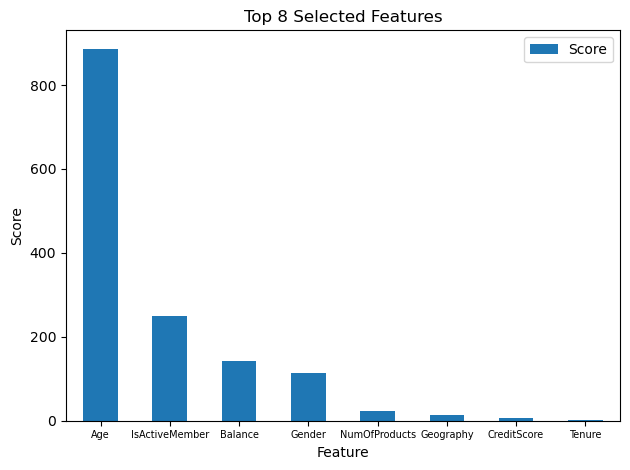

In [138]:
# Create a DataFrame with the selected features and their scores
feature_scores = pd.DataFrame({"Feature": x.columns, "Score": selector.scores_})
feature_scores = feature_scores.nlargest(k, "Score") # Select top k features based on scores

# Create a barplot of the selected features and their scores
fig=plt.figure(figsize=(12,20))
ax = feature_scores.plot.bar(x="Feature", y="Score", rot=0)
ax.set_ylabel("Score")
ax.set_title("Top {} Selected Features".format(k))
ax.tick_params(axis='x', labelsize=7)
plt.tight_layout()
plt.show()

In [ ]:
# Create a DataFrame with the selected features and their scores
feature_scores = pd.DataFrame({"Feature": df.columns, "Score": selector.pvalues_})
feature_scores = feature_scores.nlargest(k, "Score") # Select top k features based on scores

# Create a barplot of the selected features and their scores
fig=plt.figure(figsize=(12,20))
ax = feature_scores.plot.bar(x="Feature", y="Score", rot=0)
ax.set_ylabel("Score")
ax.set_title("Top {} Selected Features".format(k))
ax.tick_params(axis='x', labelsize=7)
plt.tight_layout()
plt.show()

In [144]:
selected_features=list(feature_scores['Feature'])
selected_features

['Age',
 'IsActiveMember',
 'Balance',
 'Gender',
 'NumOfProducts',
 'Geography',
 'CreditScore',
 'Tenure']

In [147]:
x=df[selected_features]
y=df['Exited']

In [156]:
from imblearn.combine import SMOTEENN

In [157]:
smote=SMOTEENN(random_state=42)
x_sampled,y_sampled=smote.fit_resample(x,y)

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.3,random_state=42)

In [160]:
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

In [163]:
logit=LogisticRegression().fit(X_train,y_train)
y_pred=logit.predict(X_test)
print("training accuracy:{}".format(logit.score(X_train,y_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,y_test)))
print(metrics.classification_report(y_pred,y_test))

training accuracy:0.8111398008115087
test accuracy:0.8081720430107527
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       945
           1       0.86      0.81      0.83      1380

    accuracy                           0.81      2325
   macro avg       0.80      0.81      0.80      2325
weighted avg       0.81      0.81      0.81      2325



In [161]:
# C=0.1, gamma=1, kernel=poly;
svm_model=SVC(C=0.1,gamma=1,kernel='poly').fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
print("training accuracy:{}".format(svm_model.score(X_train,y_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,y_test)))
print(metrics.classification_report(y_pred,y_test))

training accuracy:0.868129841386942
test accuracy:0.8576344086021506
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       928
           1       0.91      0.85      0.88      1397

    accuracy                           0.86      2325
   macro avg       0.85      0.86      0.85      2325
weighted avg       0.86      0.86      0.86      2325



In [164]:
knn_model=KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print("training accuracy:{}".format(knn_model.score(X_train,y_train)))
print("test accuracy:{}".format(accuracy_score(y_pred,y_test)))
print(metrics.classification_report(y_pred,y_test))

training accuracy:0.8749538915529325
test accuracy:0.8438709677419355
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1024
           1       0.86      0.86      0.86      1301

    accuracy                           0.84      2325
   macro avg       0.84      0.84      0.84      2325
weighted avg       0.84      0.84      0.84      2325



In [169]:
dt_model.feature_importances_

array([0.02977437, 0.04681128, 0.10003155, 0.31967685, 0.01362847,
       0.07341157, 0.1700106 , 0.00663362, 0.20450932, 0.03551236])

In [174]:
knn=RandomForestClassifier()

In [175]:
rfe = RFE(estimator=knn, n_features_to_select=5)
rfe.fit(x, y)

# Print the selected features
print("Selected Features: ", rfe.support_)

Selected Features:  [ True False  True False  True False  True  True]


In [177]:
x.columns[rfe.support_]

Index(['Age', 'Balance', 'NumOfProducts', 'CreditScore', 'Tenure'], dtype='object')

In [ ]:
# ANN model